# Project Goals

We will work with several data visualisation tools that gives us an insight into the world of roller coasters.

In [265]:
#Import Pandas to work with dataframes, matplotlib to work with graphs and seaborn for visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint as pp

In [266]:
#Reading all the csv into dataframes using pandas
steel_winners_df = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
wood_winners_df = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
roller_coasters_df = pd.read_csv('roller_coasters.csv')


In [267]:
#To get the gist of the data we are working with
print('The steel award winners are:')
display(steel_winners_df.head())
print('\nThe wood award winners are:')
display(wood_winners_df.head())
print('\nThe roller coasters details are:')
display(roller_coasters_df.head())

The steel award winners are:


,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013



The wood award winners are:


,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013



The roller coasters details are:


,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating



Let us try to plot the rank of a particular roller coaster over the years.


In [268]:
#Function to plot the ranking of a roller coaster over the years
def fx_ranking_roller_coaster(name, data):
    data_sliced = data.loc[(data.Name == name),['Rank', 'Name', 'Year of Rank']]
    plt.plot(data_sliced['Year of Rank'], data_sliced['Rank'])
    plt.xlabel('Years Of Rank')
    plt.ylabel('Rank')
    plt.title('Rank of the Roller Coasters Along the Years')
    plt.show()
    

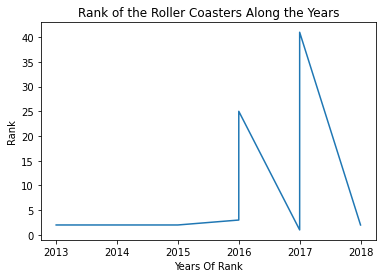

In [269]:
#Calling the function
fx_ranking_roller_coaster('El Toro', wood_winners_df)


As can be seen from the above plot that there are multiple ranks for the particular roller coaster "El Toro" for the same year which means that the roller coaster would have been present in two different parks in the same year.

To mitigate the above mentioned issue, we include the park name in our function as below:

In [270]:
#Function which includes park name too
def fx_ranking_roller_coaster_with_park(name, park, data):
    data_sliced = data.loc[((data.Name == name) & (data.Park == park)),['Rank', 'Name', 'Park', 'Year of Rank']]
    plt.plot(data_sliced['Year of Rank'], data_sliced['Rank'])
    plt.xlabel('Years Of Rank')
    plt.ylabel('Rank')
    plt.title('Rank of the Roller Coasters Along the Years')
    plt.show()
    

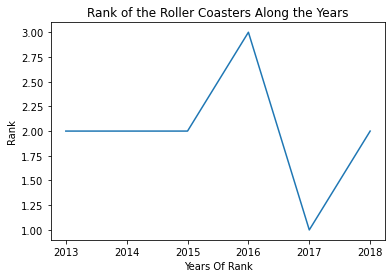

In [271]:
#Calling the function
fx_ranking_roller_coaster_with_park('El Toro', 'Six Flags Great Adventure', wood_winners_df)

As can be seen from the plot above, the issue of dual ranking for a single roller coaster in a particular year has been mitigated.



Now let us try to plot the ranks of two different roller coasters and compare how they have fared along the years by considering the rank that each of the roller coaster has secured. 

We need to bear in mind that we need to include the park names for each of the roller coasters that we plan to compare to avoid the issue we faced earlier of a single roller coaster having two ranks in a particular year.


In [272]:
#Comparing two different roller coasters
def fx_two_roller_coasters(name1, park1, name2, park2, data):
    if (name1 in list(data.Name)) & (name2 in list(data.Name)):
        if((data.index[data.Name == name1].tolist()[0] in data.index[data.Park == park1].tolist()) & \
          (data.index[data.Name == name2].tolist()[0] in data.index[data.Park == park2].tolist())):
            
            data_sliced = data.loc[((data.Name == name1) | (data.Name == name2)), ['Name', 'Park', 'Rank', 'Year of Rank']]
            plt.plot(data_sliced['Year of Rank'][(data_sliced.Name == name1) & (data_sliced.Park == park1)], \
                    data_sliced.Rank[(data_sliced.Name == name1) & (data_sliced.Park == park1)], label = name1)
            plt.plot(data_sliced['Year of Rank'][(data_sliced.Name == name2) & (data_sliced.Park == park2)], \
                    data_sliced.Rank[(data_sliced.Name == name2) & (data_sliced.Park == park2)], label = name2)
            plt.xlabel('Years')
            plt.ylabel('Rank')
            plt.title('Comparison of {} in \'{}\' and {} in \'{}\''.format(name1, park1, name2, park2))
            plt.legend()
            plt.show()
        
        else:
            print("The roller coasters and the parks that you have mentioned do not match. Please check the calling function once again")
        
        
    else:
        print("The two roller coasters are not made of the same material and thus cannot be compared.")
        


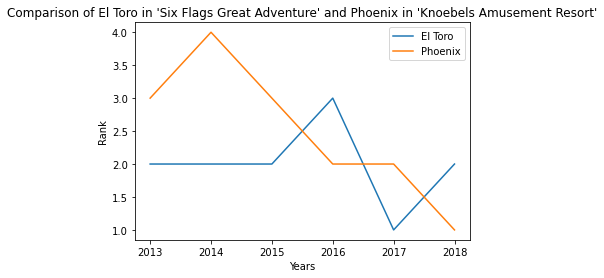

In [273]:
fx_two_roller_coasters('El Toro', 'Six Flags Great Adventure', 'Phoenix', 'Knoebels Amusement Resort', wood_winners_df)



Now let's plot the rankings of the top 'n' ranked roller coasters.



In [274]:
#Function to plot the top 'n' ranked roller coasters
def fx_top_n_ranking(n, data):
    data_sliced = data[data.Rank < 5]
    for roller_coaster in set(data_sliced.Name):
        roller_coaster_rankings = data_sliced[data_sliced.Name == roller_coaster]
        plt.plot(roller_coaster_rankings['Year of Rank'], roller_coaster_rankings.Rank, label = roller_coaster)
    plt.xlabel('Year of Ranking')
    plt.ylabel('Rank')
    plt.title('Ranking of top {} roller coasters'.format(n))
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

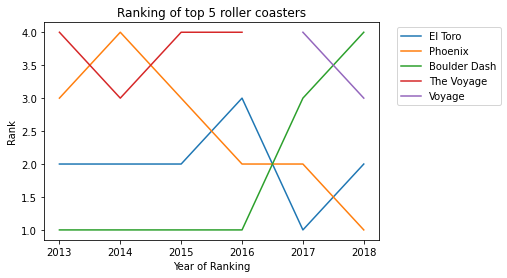

In [275]:
fx_top_n_ranking(5, wood_winners_df)




Let's try to analyse the roller coaster data available to us by starting to plot a histogram based on any numerical value. In this case, we are using the height of the roller coasters available to us. 

Upon further observation, we find that there are null values in many of the numericals which might hinder our histogram plot.

Using `.dropna()` available in pandas is a good measure before we plot any data.

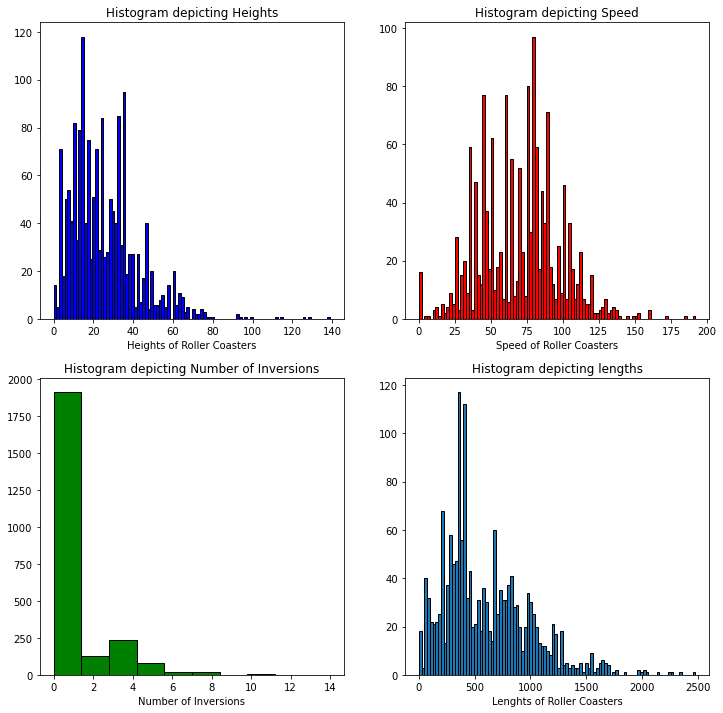

In [276]:
#Histograms of all the numerical columns in the graph
#The variables have been pre conditioned so we don't involve skewed results and outliers.

fig = plt.figure(figsize = (12,12))

plt.subplot(2,2,1)
plt.hist(roller_coasters_df.height[roller_coasters_df.height < 150].dropna(), bins = 100, color = 'blue', edgecolor = 'black')
plt.xlabel('Heights of Roller Coasters')
plt.title('Histogram depicting Heights')

plt.subplot(2,2,2)
plt.hist(roller_coasters_df.speed[roller_coasters_df.speed < 200].dropna(), bins = 100, color = 'red', edgecolor = 'black')
plt.xlabel('Speed of Roller Coasters')
plt.title('Histogram depicting Speed')

plt.subplot(2,2,3)
plt.hist(roller_coasters_df.num_inversions.dropna(), bins = 10, color = 'green', edgecolor = 'black')
plt.xlabel('Number of Inversions')
plt.title('Histogram depicting Number of Inversions')

plt.subplot(2,2,4)
plt.hist(roller_coasters_df.length[roller_coasters_df.length < 2500].dropna(), bins = 100, edgecolor = 'black')
plt.xlabel('Lenghts of Roller Coasters')
plt.title('Histogram depicting lengths')

plt.show()



Now let's create a bar chart for each of the amusement park which shows the number of inversions of each of the roller coaster present in it.



In [277]:
def fx_bar_park_roller(park, data):
    park_roller_df = data[data['park'] == park]
    plt.figure(figsize = (8,8))
    plt.bar(park_roller_df.name, park_roller_df.num_inversions)
    plt.xlabel('Roller Coasters names')
    plt.ylabel('Number of Inversions')
    plt.xticks(rotation = 90)
    plt.title('No of Inversions for each roller coaster in {}'.format(park))
    plt.show()

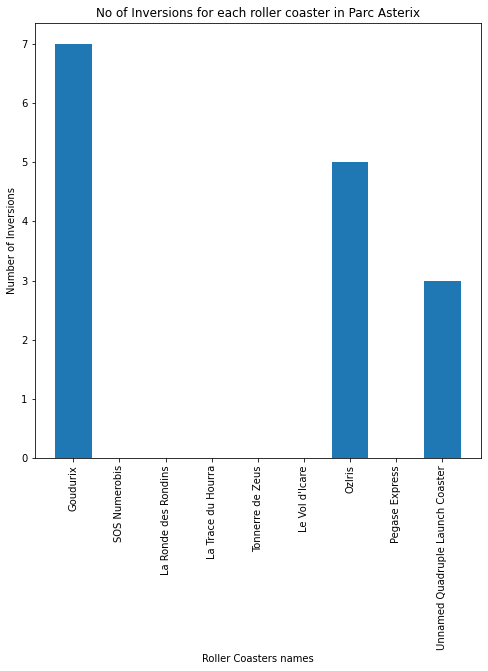

In [278]:
fx_bar_park_roller('Parc Asterix', roller_coasters_df)



Let's delve deeper into the data and find out the ratio of the functioning roller coasters to the ones which are closed indefinitely.



In [279]:
def fx_pie_coaster_working(data):
    coasters_count = [len(data[data.status == 'status.operating']), len(data[data.status == 'status.closed.definitely'])]
    plt.pie(coasters_count, autopct = '%0.1f%%', labels = ['Operating', 'Closed'])
    plt.axis('equal')
    plt.legend()
    plt.show()

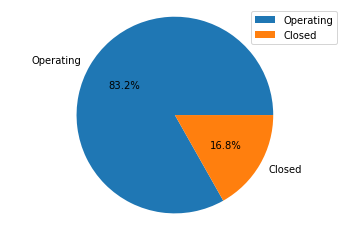

In [280]:
fx_pie_coaster_working(roller_coasters_df)

Now let's plot the scatter plots comparing each of the numerical values in the roller coaster data so we get to know how each of the columns are related to each other.

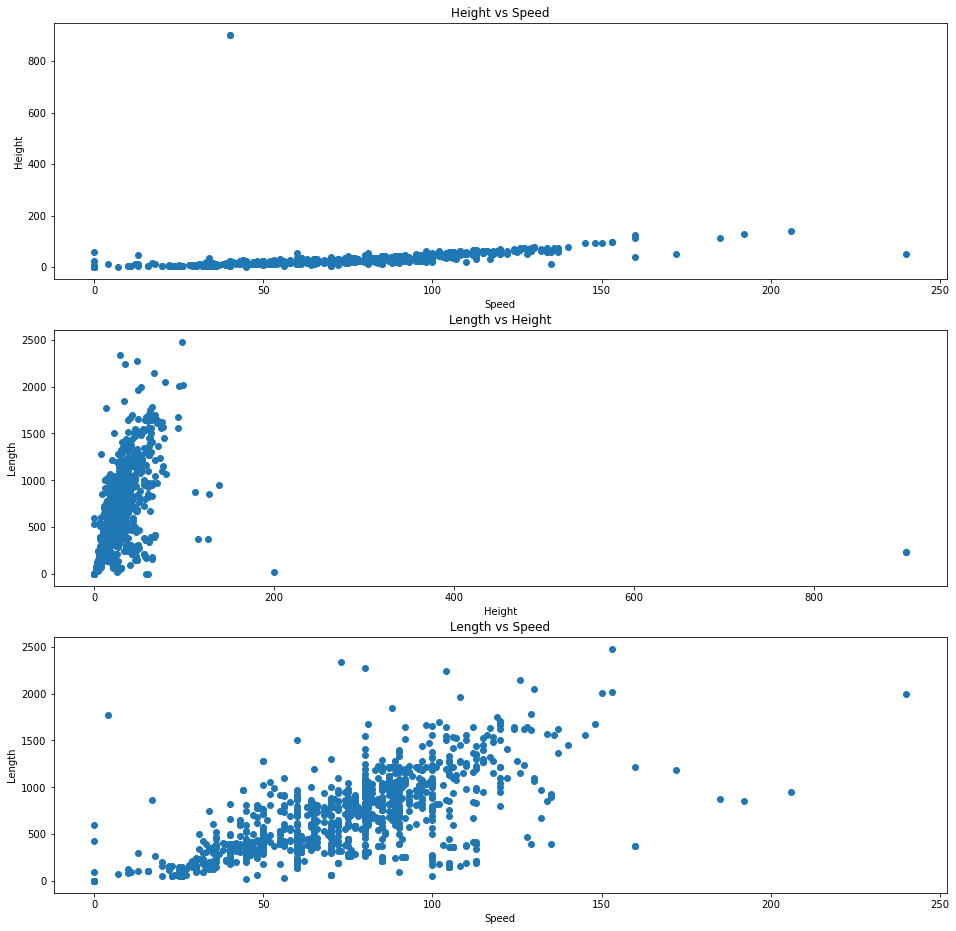

In [281]:
data_sliced = roller_coasters_df[['speed', 'height', 'length']]
plt.figure(figsize = (16,16))
plt.subplot(3,1,1)
plt.scatter(data_sliced['speed'], data_sliced['height'])
plt.xlabel('Speed')
plt.ylabel('Height')
plt.title('Height vs Speed')

plt.subplot(3,1,2)
plt.scatter(data_sliced['height'], data_sliced['length'])
plt.xlabel('Height')
plt.ylabel('Length')
plt.title('Length vs Height')

plt.subplot(3,1,3)
plt.scatter(data_sliced['speed'], data_sliced['length'])
plt.xlabel('Speed')
plt.ylabel('Length')
plt.title('Length vs Speed')

plt.show()